# Setup GPU

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
tf.config.list_physical_devices('GPU')

[]

# Remove dodgy images

In [3]:
import cv2
import imghdr

data_dir = 'D:\Project\Image Processing and Detection\POC\Parts Detection\Dataset' 
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))


C:\Users\KIIT\AppData\Local\Temp\ipykernel_23536\329965092.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


# Load Data

In [4]:
import numpy as np
from matplotlib import pyplot as plt

data = tf.keras.utils.image_dataset_from_directory('D:\Project\Image Processing and Detection\POC\Parts Detection\Dataset')

Found 24 files belonging to 5 classes.


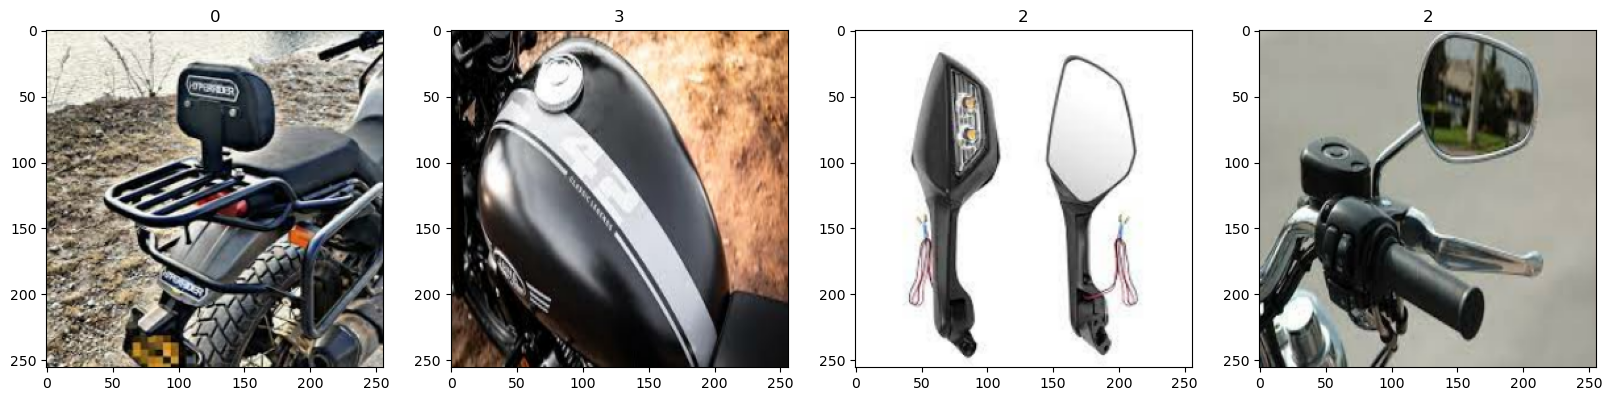

In [5]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale Data

In [6]:
data = data.map(lambda x, y: (x / 255, y))
data.as_numpy_iterator().next()

(array([[[[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686]],
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686]],
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686]],
 
         ...,
 
         [[0.2194856 , 0.2194856 , 0.2194856 ],
          [0.20562

# Split Dataset

In [9]:
from sklearn.model_selection import train_test_split

# Assuming data is your dataset
# Convert the dataset into arrays
data_arrays = list(data.as_numpy_iterator())
images, labels = zip(*data_arrays)

# Check if the dataset is large enough to be split
if len(images) > 1:
    # Split the data
    train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)
    train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2
else:
    print("Dataset is too small to be split.")

Dataset is too small to be split.


# Model

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

NameError: name 'model' is not defined

In [ ]:
# Assuming you have already loaded and preprocessed your images and labels
model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(val_images, val_labels))

In [ ]:
model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(val_images, val_labels), callbacks=[tensorboard_callback])

In [ ]:
# Assuming you have already loaded and preprocessed your test images and labels
eval_result = model.evaluate(test_images, test_labels)
print(f"Test Loss: {eval_result[0]}, Test Accuracy: {eval_result[1]}")

model.save(os.path.join('models', 'imageclassifier.h5'))

# Model Performance

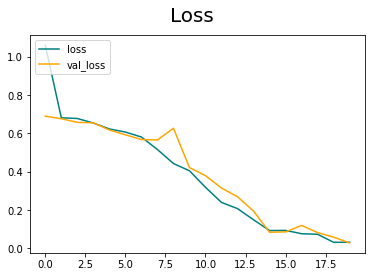

In [34]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

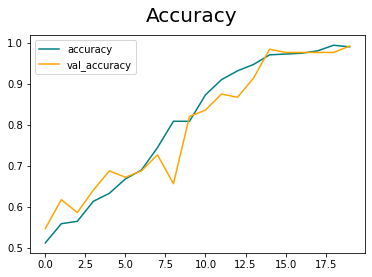

In [35]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [36]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [37]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [38]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 154ms/step


In [39]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# Save the Model

In [40]:
from tensorflow.keras.models import load_model

In [41]:
model.save(os.path.join('models','imageclassifier.h5'))

# Test the model

In [49]:
import cv2

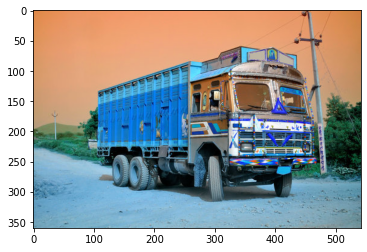

In [50]:
img = cv2.imread('images.jpg')
plt.imshow(img)
plt.show()

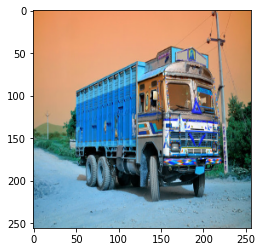

In [51]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [52]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 41ms/step


In [53]:
yhat

array([[0.97098464]], dtype=float32)

In [54]:
if yhat > 0.5: 
    print(f'Predicted class is truck')
else:
    print(f'Predicted class is car')

Predicted class is truck
